# MovieLens Dataset Movie Recommendation

## Import datasets

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./ratings.csv', sep=',', usecols=['userId', 'movieId', 'rating'])
df.head()

userId  movieId  rating
0       1      296     5.0
1       1      306     3.5
2       1      307     5.0
3       1      665     5.0
4       1      899     3.5

In [4]:
movie_titles = pd.read_csv("./movies.csv", sep=',', usecols=['movieId', 'title'])
movie_titles.head()

movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

In [5]:
df = pd.merge(df,movie_titles,on='movieId')
df.head()

userId  movieId  rating                title
0       1      296     5.0  Pulp Fiction (1994)
1       3      296     5.0  Pulp Fiction (1994)
2       4      296     4.0  Pulp Fiction (1994)
3       5      296     4.0  Pulp Fiction (1994)
4       7      296     4.0  Pulp Fiction (1994)

## Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Full of Grace (2015)            5.0
Geordie (1955)                  5.0
Garfield In Paradise (1986)     5.0
Lost Woods (2012)               5.0
Garfield in the Rough (1984)    5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                                                       
"BLOW THE NIGHT!" Let's Spend the Night Togethe...  3.000000
"Great Performances" Cats (1998)                    2.896648
#1 Cheerleader Camp (2010)                          2.111111
#Captured (2017)                                    3.750000
#Female Pleasure (2018)                             3.666667

In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

rating  num of ratings
title                                                                       
"BLOW THE NIGHT!" Let's Spend the Night Togethe...  3.000000               1
"Great Performances" Cats (1998)                    2.896648             179
#1 Cheerleader Camp (2010)                          2.111111               9
#Captured (2017)                                    3.750000               2
#Female Pleasure (2018)                             3.666667               3

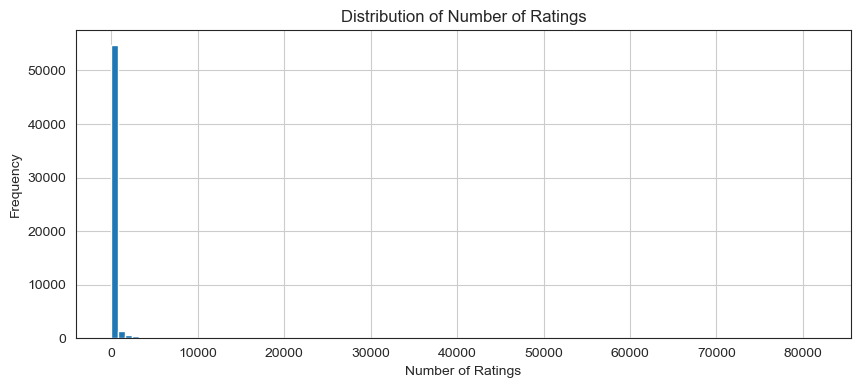

In [11]:
plt.figure(figsize=(10, 4))
ratings['num of ratings'].hist(bins=100)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

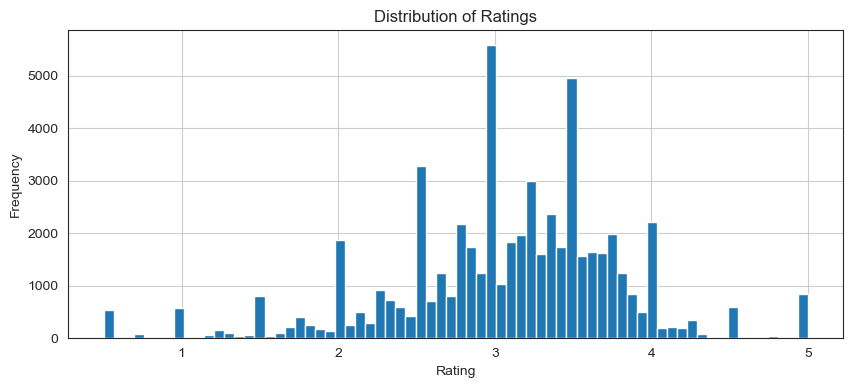

In [12]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=70)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

c:\Users\hiaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hiaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

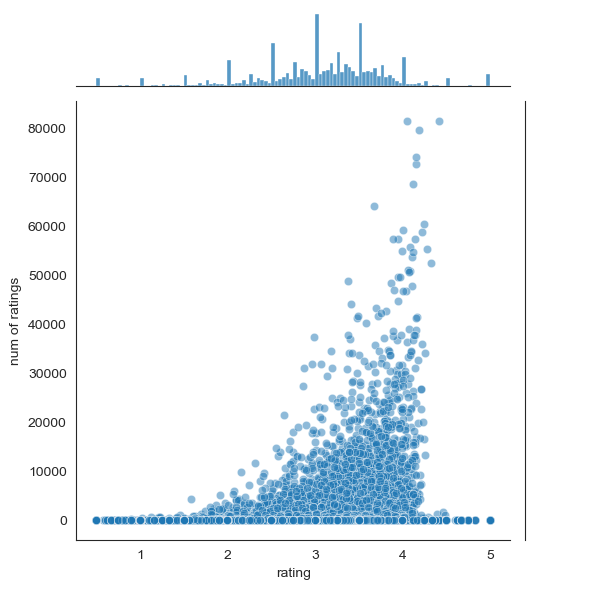

In [13]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommender Model

In [5]:
# Check for duplicates
duplicates = df.duplicated(subset=['userId', 'title', 'rating'])
df[duplicates]


userId  movieId  rating                     title
23354010     494    64997     2.5  War of the Worlds (2005)
23354013    1835    64997     3.5  War of the Worlds (2005)
23354014    2403    64997     2.0  War of the Worlds (2005)
23354015    2834    64997     3.5  War of the Worlds (2005)
23354017    2974    64997     3.5  War of the Worlds (2005)
...          ...      ...     ...                       ...
24973193   58588   194845     2.5           Delirium (2018)
24974268   75309   199035     5.0        Blood Money (2017)
24991279   75309   118818     5.0             Frozen (2010)
24992121   75309   192405     5.0           Cold War (2018)
24996971  134045   168088     2.0             Gossip (2000)

[334 rows x 4 columns]

In [5]:
num_users = df['userId'].nunique()
num_movies = df['title'].nunique()
print(f"Number of users: {num_users}")
print(f"Number of movies: {num_movies}")

Number of users: 162541
Number of movies: 58958


In [14]:
min_reviews_movie = 10
popular_movies = df['title'].value_counts()
top_movies = popular_movies[popular_movies >= min_reviews_movie].index
df_filtered_movies = df[df['title'].isin(top_movies)]

In [21]:
min_reviews_user = 150
users_with_enough_reviews = df_filtered_movies['userId'].value_counts()
active_users = users_with_enough_reviews[users_with_enough_reviews >= min_reviews_user].index
df_filtered_users = df_filtered_movies[df_filtered_movies['userId'].isin(active_users)]

In [22]:
print(f"Number of active users: {len(active_users)}")
print(f"Number of top movies: {len(top_movies)}")

Number of active users: 43897
Number of top movies: 24319


In [23]:
# Create pivot table from the filtered dataset
moviemat_filtered = df_filtered_users.pivot_table(index='userId', columns='title', values='rating')

In [11]:
import pickle

In [12]:
pickle.dump(moviemat_filtered, open('moviemat.pkl','wb'))

In [18]:
pickle.dump(ratings, open('ratings.pkl','wb'))

In [13]:
print(moviemat_filtered.head())

title   "Great Performances" Cats (1998)  #Horror (2015)  #realityhigh (2017)  \
userId                                                                          
2                                    NaN             NaN                  NaN   
3                                    NaN             NaN                  NaN   
4                                    NaN             NaN                  NaN   
8                                    NaN             NaN                  NaN   
9                                    NaN             NaN                  NaN   

title   $ (Dollars) (1971)  $5 a Day (2008)  $9.99 (2008)  '71 (2014)  \
userId                                                                  
2                      NaN              NaN           NaN         NaN   
3                      NaN              NaN           NaN         NaN   
4                      NaN              NaN           NaN         NaN   
8                      NaN              NaN           NaN         N

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

rating  num of ratings
title                                                              
Forrest Gump (1994)                        4.048011           81491
Shawshank Redemption, The (1994)           4.413576           81482
Pulp Fiction (1994)                        4.188912           79672
Silence of the Lambs, The (1991)           4.151342           74127
Matrix, The (1999)                         4.154099           72674
Star Wars: Episode IV - A New Hope (1977)  4.120189           68717
Jurassic Park (1993)                       3.679175           64144
Schindler's List (1993)                    4.247579           60411
Braveheart (1995)                          4.002273           59184
Fight Club (1999)                          4.228311           58773

In [ ]:
ratings.head()

rating  num of ratings
title                                                                       
"BLOW THE NIGHT!" Let's Spend the Night Togethe...  3.000000               1
"Great Performances" Cats (1998)                    2.896648             179
#1 Cheerleader Camp (2010)                          2.111111               9
#Captured (2017)                                    3.750000               2
#Female Pleasure (2018)                             3.666667               3

In [ ]:
starwars_user_ratings = moviemat_filtered['Forrest Gump (1994)']
liarliar_user_ratings = moviemat_filtered['Star Wars: Episode IV - A New Hope (1977)']

In [ ]:
starwars_user_ratings.head()

userId
3     4.0
4     NaN
12    4.0
13    5.0
19    4.0
Name: Forrest Gump (1994), dtype: float64

In [ ]:
liarliar_user_ratings.head()

userId
3     4.0
4     3.5
12    5.0
13    4.5
19    3.5
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [ ]:
similar_to_starwars = moviemat_filtered.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat_filtered.corrwith(liarliar_user_ratings)

c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

Correlation
title                                        
"Great Performances" Cats (1998)     0.336926
#1 Cheerleader Camp (2010)           0.392953
#FollowMe (2019)                    -0.958002
#Horror (2015)                       0.278801
#realityhigh (2017)                  0.814558

In [ ]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

Correlation  num of ratings
title                                                        
"Great Performances" Cats (1998)     0.336926             179
#1 Cheerleader Camp (2010)           0.392953               9
#FollowMe (2019)                    -0.958002               6
#Horror (2015)                       0.278801              23
#realityhigh (2017)                  0.814558              18

In [ ]:
corr_starwars[corr_starwars['num of ratings']>10000].sort_values('Correlation',ascending=False).head()

Correlation  num of ratings
title                                                        
Forrest Gump (1994)                  1.000000           81491
Green Mile, The (1999)               0.437580           30482
Rain Man (1988)                      0.421878           27813
Cast Away (2000)                     0.408438           25024
Shawshank Redemption, The (1994)     0.394984           81482

In [ ]:

corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>10000].sort_values('Correlation',ascending=False).head()

Correlation  \
title                                                             
Star Wars: Episode IV - A New Hope (1977)              1.000000   
Star Wars: Episode V - The Empire Strikes Back ...     0.775681   
Star Wars: Episode VI - Return of the Jedi (1983)      0.705532   
Raiders of the Lost Ark (Indiana Jones and the ...     0.517146   
Star Wars: Episode VII - The Force Awakens (2015)      0.482471   

                                                    num of ratings  
title                                                               
Star Wars: Episode IV - A New Hope (1977)                    68717  
Star Wars: Episode V - The Empire Strikes Back ...           57361  
Star Wars: Episode VI - Return of the Jedi (1983)            54917  
Raiders of the Lost Ark (Indiana Jones and the ...           54675  
Star Wars: Episode VII - The Force Awakens (2015)            12678

In [22]:
def get_usage(movie_title: str):
    movie_user_ratings = moviemat_filtered[movie_title]
    similar_to_movie = moviemat_filtered.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    return corr_movie[corr_movie['num of ratings'] > 10000].sort_values('Correlation', ascending=False).head()

In [23]:
get_usage('Toy Story (1995)')

c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\hiaru\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlation  num of ratings
title                                             
Toy Story (1995)          1.000000           57309
Toy Story 2 (1999)        0.749068           26536
Toy Story 3 (2010)        0.675401           14426
Monsters, Inc. (2001)     0.560606           34572
Bug's Life, A (1998)      0.540346           22471